In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable # si nos da un error este comando es por no tenerlo instalado
from datetime import date, datetime
from scipy import stats
from sklearn.preprocessing import StandardScaler
pd.options.display.max_columns=None
# establecer el tamaño de nuestras figuras
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df = pd.read_csv('data/ocasionales_encod.csv', index_col = 0)
df.head(2)

,registro,clima,temperatura,sens_termica,humedad,viento,ocasionales,fecha_nueva,festividad,festividad_1,mes_bueno,dia_semana_nuevo,no_laboral_nuevo,ocasionales_BOX,año_map,estacion_map
0,1,2,14.1,18.2,81.0,10.7,331,2018-01-01,New Year's Day,1,1,0,0,16.397820,0,0
1,2,2,14.9,17.7,70.0,16.7,131,2018-01-02,NaN,0,1,1,1,11.472437,0,0


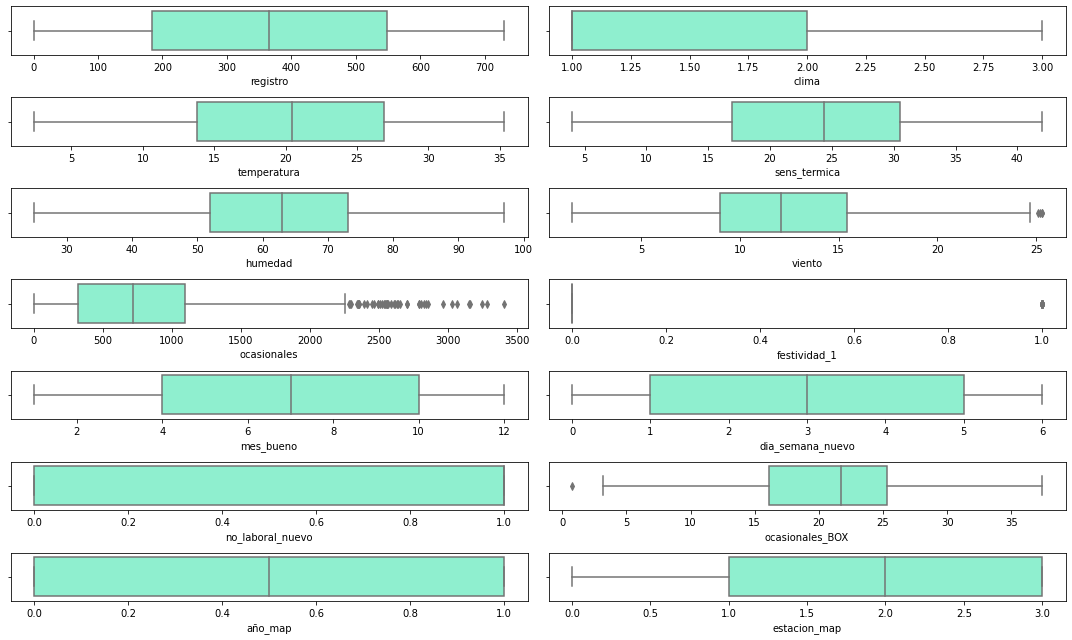

In [4]:
fig, axes = plt.subplots(7,2, figsize=(15,9))

axes = axes.flat
numericas = df.select_dtypes(include = np.number)
for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); 

    
plt.tight_layout()
plt.show()

In [5]:
df.columns

Index(['registro', 'clima', 'temperatura', 'sens_termica', 'humedad', 'viento',
       'ocasionales', 'fecha_nueva', 'festividad', 'festividad_1', 'mes_bueno',
       'dia_semana_nuevo', 'no_laboral_nuevo', 'ocasionales_BOX', 'año_map',
       'estacion_map'],
      dtype='object')

In [7]:
numericas.drop(['registro', 'clima',
       'ocasionales', 'festividad_1', 'mes_bueno',
       'dia_semana_nuevo', 'no_laboral_nuevo', 'ocasionales_BOX', 'año_map',
       'estacion_map'], axis = 1, inplace = True)

numericas.head(2)

,temperatura,sens_termica,humedad,viento
0,14.1,18.2,81.0,10.7
1,14.9,17.7,70.0,16.7


In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(numericas)

StandardScaler()

In [10]:
X_escaladas = scaler.transform(numericas)

In [11]:

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,temperatura,sens_termica,humedad,viento
0,-0.828948,-0.678635,1.295131,-0.376545
1,-0.722312,-0.740034,0.507407,0.882110


In [12]:
for columna in numericas_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_estandar[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna temperatura es:  -8.760115920330002e-17
La desviación estándar de la columna temperatura es: 1.0006856360078742
-------------------------------------------------------------
La media de la columna sens_termica es:  -3.893384853480001e-16
La desviación estándar de la columna sens_termica es: 1.000685636007875
-------------------------------------------------------------
La media de la columna humedad es:  -1.5573539413920004e-16
La desviación estándar de la columna humedad es: 1.0006856360078744
-------------------------------------------------------------
La media de la columna viento es:  1.2653500773810003e-16
La desviación estándar de la columna viento es: 1.000685636007874
-------------------------------------------------------------


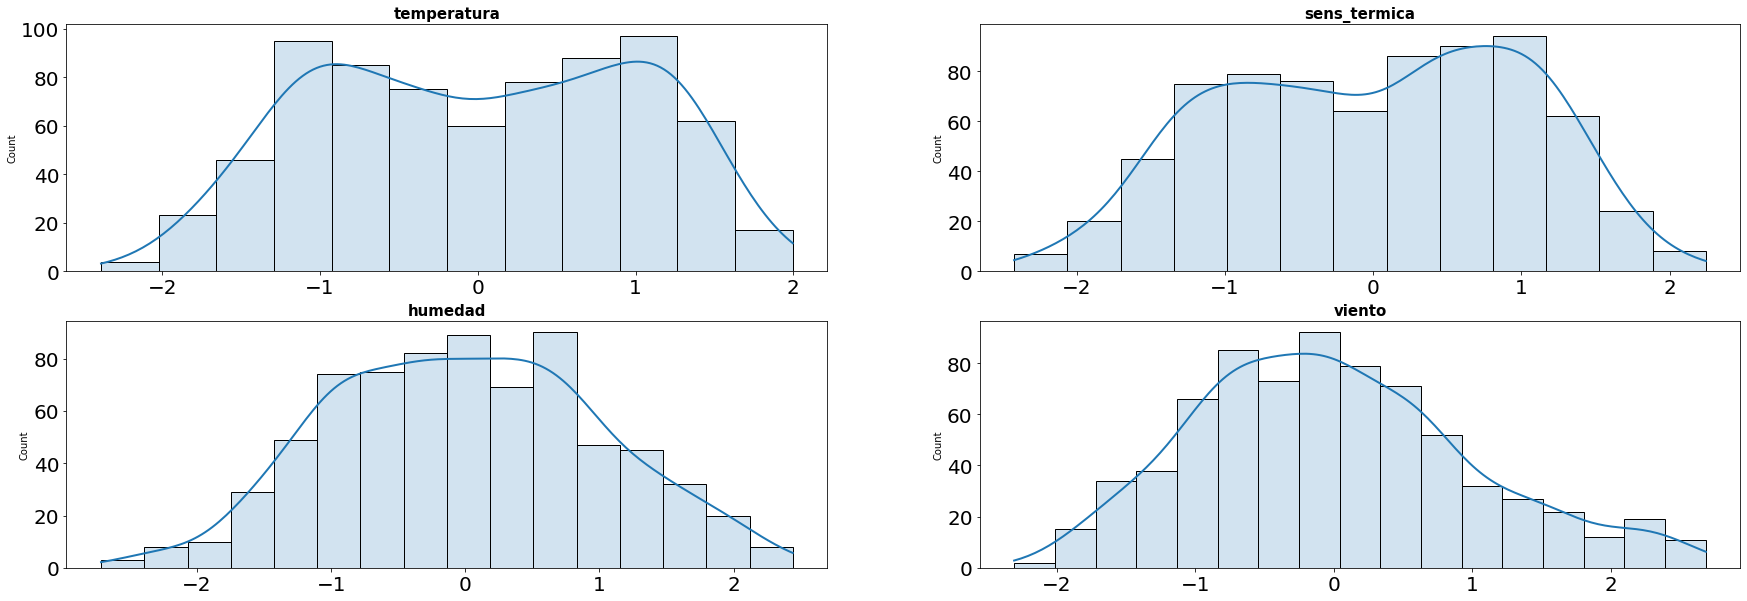

In [13]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))

columnas_estandar = numericas_estandar.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

In [14]:
df[numericas_estandar.columns] = numericas_estandar
df.head()

,registro,clima,temperatura,sens_termica,humedad,viento,ocasionales,fecha_nueva,festividad,festividad_1,mes_bueno,dia_semana_nuevo,no_laboral_nuevo,ocasionales_BOX,año_map,estacion_map
0,1,2,-0.828948,-0.678635,1.295131,-0.376545,331,2018-01-01,New Year's Day,1,1,0,0,16.397820,0,0
1,2,2,-0.722312,-0.740034,0.507407,0.882110,131,2018-01-02,NaN,0,1,1,1,11.472437,0,0
2,3,1,-1.642047,-1.746977,-1.354487,0.861132,120,2018-01-03,NaN,0,1,2,1,11.076035,0,0
3,4,1,-1.615388,-1.611900,-0.280318,-0.376545,108,2018-01-04,NaN,0,1,3,1,10.613970,0,0
4,5,1,-1.468763,-1.501382,-1.354487,0.001051,82,2018-01-05,NaN,0,1,4,1,9.475537,0,0


In [15]:
df.to_csv("data/ocasionales_est_encod.csv")